Upload TRAIN .npy files


Saving 0.npy to 0 (1).npy
Saving 1.npy to 1 (1).npy
Saving 2.npy to 2 (1).npy
Saving 3.npy to 3 (1).npy
Saving 4.npy to 4 (1).npy
Saving 5.npy to 5 (1).npy
Saving 6.npy to 6 (1).npy
Saving 7.npy to 7 (1).npy
Saving 8.npy to 8 (1).npy
Saving 9.npy to 9 (1).npy
Saving 10.npy to 10 (1).npy
Saving 11.npy to 11 (1).npy
Saving 12.npy to 12 (1).npy
Saving 13.npy to 13 (1).npy
Saving 14.npy to 14 (1).npy
Saving 15.npy to 15 (1).npy
Saving 16.npy to 16 (1).npy
Saving 17.npy to 17 (1).npy
Saving 18.npy to 18 (1).npy
Saving 19.npy to 19 (1).npy
Saving 20.npy to 20 (1).npy
Saving 21.npy to 21 (1).npy
Saving 22.npy to 22 (1).npy
Saving 23.npy to 23 (1).npy
Saving 24.npy to 24 (1).npy
Saving 25.npy to 25 (1).npy
Saving 26.npy to 26 (1).npy
Saving 27.npy to 27 (1).npy
Saving 28.npy to 28 (1).npy
Saving 29.npy to 29 (1).npy
Saving 30.npy to 30 (1).npy
Saving 31.npy to 31 (1).npy
Saving 32.npy to 32 (1).npy
Saving 33.npy to 33 (1).npy
Saving 34.npy to 34 (1).npy
Saving 35.npy to 35 (1).npy
Saving 36.np

Saving 0.npy to 0 (1).npy
Saving 1.npy to 1 (1).npy
Saving 2.npy to 2 (1).npy
Saving 3.npy to 3 (1).npy
Saving 4.npy to 4 (1).npy
Saving 5.npy to 5 (1).npy
Saving 6.npy to 6 (1).npy
Saving 7.npy to 7 (1).npy
Saving 8.npy to 8 (1).npy
Saving 9.npy to 9 (1).npy
Saving 10.npy to 10 (1).npy
Saving 11.npy to 11 (1).npy
Saving 12.npy to 12 (1).npy
Saving 13.npy to 13 (1).npy
Saving 14.npy to 14 (1).npy
Saving 15.npy to 15 (1).npy
Saving 16.npy to 16 (1).npy
Saving 17.npy to 17 (1).npy
Saving 18.npy to 18 (1).npy
Saving 19.npy to 19 (1).npy
Saving 20.npy to 20 (1).npy
Saving 21.npy to 21 (1).npy
Saving 22.npy to 22 (1).npy
Saving 23.npy to 23 (1).npy
Saving 24.npy to 24 (1).npy
Saving 25.npy to 25 (1).npy
Saving 26.npy to 26 (1).npy
Saving 27.npy to 27 (1).npy
Saving 28.npy to 28 (1).npy
Saving 29.npy to 29 (1).npy
Saving 30.npy to 30 (1).npy
Saving 31.npy to 31 (1).npy
Saving 32.npy to 32 (1).npy
Saving 33.npy to 33 (1).npy
Saving 34.npy to 34 (1).npy
Saving 35.npy to 35 (1).npy
Saving 36.np

Saving label_train.csv to label_train (13).csv
Saving test_format.csv to test_format (1).csv


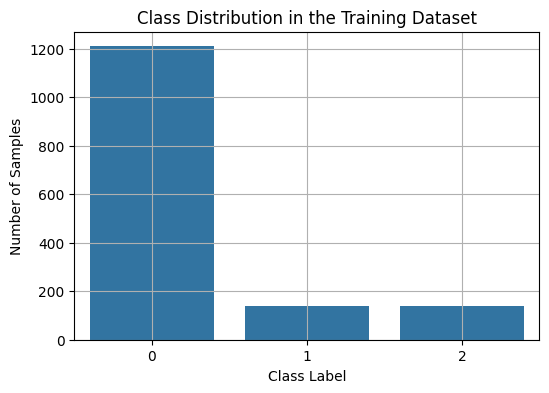

✅ Loaded: 1491 / 1491 training files


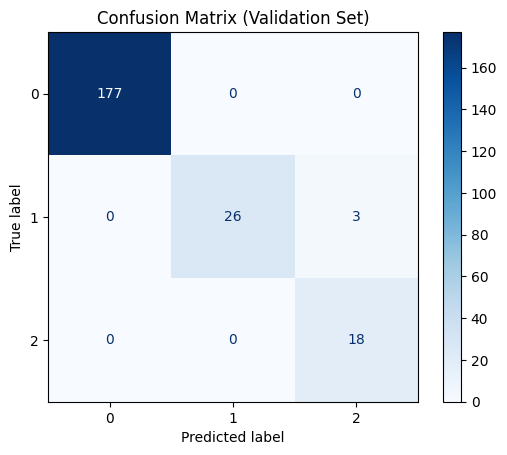

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      0.90      0.95        29
           2       0.86      1.00      0.92        18

    accuracy                           0.99       224
   macro avg       0.95      0.97      0.96       224
weighted avg       0.99      0.99      0.99       224



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Submission file 'submission.csv' ready for Kaggle 🚀


In [27]:
# 📦 Imports
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files

# 📁 Create folders
os.makedirs("train", exist_ok=True)
os.makedirs("test", exist_ok=True)

# 📤 Upload TRAIN .npy
print("Upload TRAIN .npy files")
uploaded_train = files.upload()
for fname in uploaded_train:
    clean_name = re.sub(r"\s*\(\d+\)", "", fname)
    os.rename(fname, os.path.join("train", clean_name))

# 📤 Upload TEST .npy
print("Upload TEST .npy files")
uploaded_test = files.upload()
for fname in uploaded_test:
    clean_name = re.sub(r"\s*\(\d+\)", "", fname)
    os.rename(fname, os.path.join("test", clean_name))

# 📤 Upload CSV files
print("Upload CSV files")
uploaded_csv = files.upload()
for fname in uploaded_csv:
    if "label_train" in fname:
        os.rename(fname, "label_train.csv")
    if "test_format" in fname:
        os.rename(fname, "test_format.csv")

# 📊 Load training labels
labels_df = pd.read_csv("label_train.csv")
labels_df.columns = labels_df.columns.str.strip()

# 📈 Graph 1: Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=labels_df["target"])
plt.title("Class Distribution in the Training Dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

# 📥 Load training samples
X = []
y = []
missing = []

for _, row in labels_df.iterrows():
    file_name = f"{row['ID']}.npy"
    path = os.path.join("train", file_name)
    if os.path.exists(path):
        data = np.load(path).flatten()
        X.append(data)
        y.append(row['target'])
    else:
        missing.append(file_name)

print(f"✅ Loaded: {len(X)} / {len(labels_df)} training files")
if missing:
    print("❌ Missing training files:", missing[:5])

X = np.array(X)
y = np.array(y)

# 🧼 Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔀 Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# 🌲 Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# 📊 Predictions on validation set
y_val_pred = rf.predict(X_val)

# 📉 Graph 2: Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.grid(False)
plt.show()

# 📄 Graph 3: Classification Report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# 🔮 Load test data
test_df = pd.read_csv("test_format.csv")
test_df.columns = test_df.columns.str.strip()

X_test = []
missing_test = []

for test_id in test_df["ID"]:
    file_path = os.path.join("test", f"{test_id}.npy")
    if os.path.exists(file_path):
        data = np.load(file_path).flatten()
        X_test.append(data)
    else:
        missing_test.append(test_id)

if missing_test:
    print("❌ Missing test files:", missing_test[:5])

X_test = np.array(X_test)
X_test = scaler.transform(X_test)

# 🔄 Make predictions
y_test_pred = rf.predict(X_test)

# 📝 Generate submission
submission = test_df.copy()
submission["target"] = y_test_pred
submission.to_csv("submission.csv", index=False)

# 📤 Download submission
files.download("submission.csv")
print("✅ Submission file 'submission.csv' ready for Kaggle 🚀")
